In [387]:
"""
import modules
"""
from prepare_data import prepare_df_from_mac_5_year as prepare_data
from prepare_data import filter_IAMC as IAMC
from emulate_reduction import emulator_v3 as emulate
from visualize_output import vis_emulator_v1 as v1_plot
from pym import pym

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

dir(emulate)

['CtaxRedEmulator',
 'Lasso',
 'LinearRegression',
 'PolynomialFeatures',
 'Ridge',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'mean_squared_error',
 'minimize',
 'np',
 'pd',
 'plt',
 'r2_score',
 'train_test_split',
 'tree']

In [388]:
"""
load data
"""

PATH = 'C:/Users/toonv/Documents/PBL/Data/cost curves/'
PATH_IAMC = 'C:/Users/toonv/Documents/PBL/Data/IAMC_paths/'
PATH_IAMC_MYM = 'C:/Users/toonv/Documents/PBL/Data/IAMC_paths_mym/'
PATH_IAMC_CSV = 'C:/Users/toonv/Documents/PBL/Data/IAMC_paths_csv/'

FILENAME_LIN = 'costcurve_co2_linear.dat'
FILENAME_CUBIC = 'costcurve_co2_cubic.dat'
FILENAME_CUBICROOT = 'costcurve_co2_cubicroot.dat'
FILENAME_IAMC = 'iamc15_scenario_data_world_r2.0.xlsx'
FILENAME_MEAN_TEMP = 'mean_temp.csv'

df_linear = pd.read_table(PATH + FILENAME_LIN,
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_cubic = pd.read_table(PATH + FILENAME_CUBIC,
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_cubicroot = pd.read_table(PATH + FILENAME_CUBICROOT,
                          skiprows = [0,1,2], sep = ',', names = list(range(1,27)), index_col=False)

df_combined = pd.concat([df_linear, df_cubic, df_cubicroot])
df_cubic_cubicroot = pd.concat([df_cubic, df_cubicroot]) 

# new paths, from IAMC databese
IAMC_database = pd.read_excel(PATH_IAMC + FILENAME_IAMC, sheet_name='data')

C:\Users\toonv\Anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\toonv\Anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\toonv\Anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\toonv\Anaconda3\lib\site-packages\pan

,2020,2030,2040,2050,2060,2070,2080,2090,2100
1229,0.000000,0.000000,293.017268,269.344908,1642.127713,2175.649364,1872.288372,1453.946924,3820.024838
1230,0.000000,0.000000,176.888505,2143.421960,3704.827220,3887.021058,2299.627602,3580.834798,490.726859
1231,291.330126,223.705011,709.334438,1615.256432,1290.831404,870.989284,2210.230198,724.988442,1814.100252
1232,189.603427,169.979620,452.313989,131.350950,443.114831,943.890325,3011.824131,2563.104552,3495.814915
1233,165.915794,37.372606,3266.122975,3619.924851,2984.009846,2393.868895,1154.566553,304.368573,3897.774241


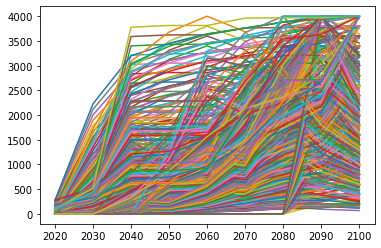

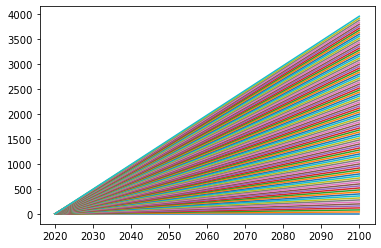

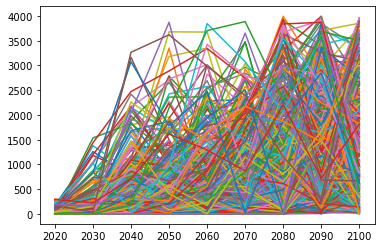

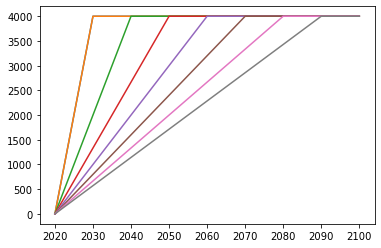

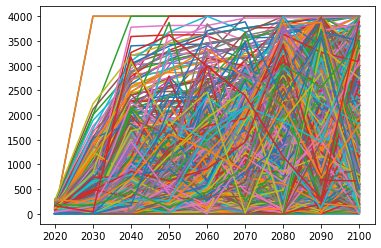

In [439]:
"""
prepare data from IAMC database
"""

reload(IAMC)

YEAR_STEP = 10
MAX_CTAX = 4000
BINS = 15
MODELS = ['IMAGE']
STEP_CTAX = 200
MAX_RAND = 2

raw_data = IAMC.IAMC(IAMC_database)

carbon_prices, models_ctax = raw_data.filter_iamc(YEAR_STEP, 'Price|Carbon', MAX_CTAX, MODELS)
# mean_temp, models_temp = raw_data.filter_iamc(year_step, 'AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|MED',
#                                               MAX_CTAX, MODELS)

# scaled and lin ctax
scaled_ctax_paths = raw_data.scale_ctax(STEP_CTAX)
lin_ctax_paths = raw_data.get_linear(MAX_CTAX)
sparse_ctax_paths = raw_data.sparse_linear(MAX_CTAX)
random_ctax_paths = raw_data.get_random(MAX_RAND, MAX_CTAX)

# plot paths
raw_data.plot_ctax_paths(sparse_ctax_paths)

# merged dataframe
all_paths = raw_data.merge_all(PATH_IAMC, 'all_ctax_paths.xlsx')
raw_data.plot_ctax_paths(all_paths)


# save data to path
raw_data.prepare_mym(all_paths, PATH_IAMC_MYM, PATH_IAMC_CSV, 'ctax_train_')
all_paths.tail()

In [380]:
"""
global variables 

year, region functie aanroepen waar je jaar en regio in kan vullen die alle stappen dan uitvoert.\\

dit zijn global constants dus kan gewoon in kleine letters

"""

year = 2060
region = 11
TIMERSTEP = 5
test_size = 0.1
stepsize_ctax_paths = 10
number_of_weights = 2

In [ ]:
"""
prepare data using prepare_df

input: MAC sets (df)

output: ctax paths with reduction
"""
reload(prepare_data)

lin_reduction = prepare_data.reduction_df(df_linear, year, region)
cubic_reduction = prepare_data.reduction_df(df_cubic, year, region)
root_reduction = prepare_data.reduction_df(df_cubicroot, year, region)

lin_paths = prepare_data.find_path(lin_reduction, 'linear', TIMERSTEP)
cubic_paths = prepare_data.find_path(cubic_reduction, 'cubic', TIMERSTEP)
root_paths = prepare_data.find_path(root_reduction, 'cubicroot', TIMERSTEP)

combi = pd.concat([cubic_paths, root_paths])
combi.year = cubic_paths.year
combi.region = cubic_paths.region

combi.tail()

In [ ]:
"""
train prepared dataframe 

input: ctax paths with reduction

output: trained dataset
"""

reload(emulate)

x = emulate.CtaxRedEmulator(lin_paths, cubic_paths, test_size)

x.train_ctax_path(stepsize_ctax_paths, number_of_weights)   
    
x.test_ctax_paths() 


In [ ]:
reload(emulate)

x = emulate.CtaxRedEmulator(lin_paths, combi, test_size)

# multi linear regression model
multi_lin_regr_mod = x.train_ctax_MLR()
multi_lin_plot = x.test_regr(multi_lin_regr_mod)

# polynomial regression model
degree = 3
poly_regr_mod = x.train_ctax_PR(degree)
poly_regr_plot = x.test_regr(poly_regr_mod)

# Ridge regression
alpha = 1
ridge_mod = x.train_ctax_ridge(alpha)
ridge_plot = x.test_regr(ridge_mod)

# lasso regression
alpha = 1
lasso_mod = x.train_ctax_lasso(alpha)
lasso_plot = x.test_regr(lasso_mod)

# regression tree
max_depth = 5
regr_tree = x.train_ctax_tree(max_depth)
tree_plot = x.test_regr(regr_tree)
